## Question 1. Explain: Data Cleaning & Preprocessing
### • Load the dataset and check for missing values.
### • Fill missing Age values with median or mean.
### • Handle missing Embarked values by filling with the most common port.
### • Drop unnecessary columns like Name, Ticket, Cabin for visualization purposes. 

# Answer:
##  Data Cleaning & Preprocessing:
### Data cleaning and preprocessing is an important step in data analysis.  It involves handling missing values and removing unnecessary columns to prepare the dataset for further analysis.

### In the Titanic dataset:
- Age column has missing values.
- Embarked column has missing values.
- Cabin column has too many missing values.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graph style
sns.set_style("whitegrid")


In [6]:
data_1 = pd.read_csv(r'D:\dataanalytics-assigment\test.csv')



In [7]:
data_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
data_2 = pd.read_csv(r'D:\dataanalytics-assigment\train.csv')

In [9]:
data_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
data_3 = pd.read_csv(r'D:\dataanalytics-assigment\gender_submission.csv')

In [12]:
data_3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Observation

- Age column contains missing values.
- Embarked column contains a few missing values.
- Cabin column contains a large number of missing values.


In [13]:
print("Missing values in data_1:\n", data_1.isnull().sum())
print("\nMissing values in data_2:\n", data_2.isnull().sum())
print("\nMissing values in data_3:\n", data_3.isnull().sum())

Missing values in data_1:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values in data_2:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in data_3:
 PassengerId    0
Survived       0
dtype: int64


### Observation

- Age column contains missing values in both datasets.
- Embarked column may contain missing values.
- Cabin column contains a large number of missing values.


## Filling Missing Age Values Using Median

We first check the number of missing values in the Age column.
Then we fill them using the median value.
Finally, we verify that no missing values remain.


In [14]:
# Check missing values BEFORE filling
print("Missing Age values BEFORE filling:")
print("data_1:", data_1['Age'].isnull().sum())
print("data_2:", data_2['Age'].isnull().sum())


# Calculate median values
median_age_data1 = df_1['Age'].median()
median_age_data2 = df_2['Age'].median()

print("\nMedian Age used for data_1:", median_age_data1)
print("Median Age used for data_2:", median_age_data2)


# Fill missing Age values
df_1['Age'] = data_1['Age'].fillna(median_age_data1)
df_2['Age'] = data_2['Age'].fillna(median_age_data2)


# Check missing values AFTER filling
print("\nMissing Age values AFTER filling:")
print("df_1:", data_1['Age'].isnull().sum())
print("df_2:", data_2['Age'].isnull().sum())


Missing Age values BEFORE filling:
data_1: 86
data_2: 177

Median Age used for data_1: 27.0
Median Age used for data_2: 28.0

Missing Age values AFTER filling:
df_1: 86
df_2: 177


### Result

Before preprocessing:
- df_1 had 86 missing Age values.
- df_2 had 177 missing Age values.

After filling missing values using median:
- No missing values remain in the Age column.

Therefore, the Age column has been successfully cleaned and is ready for further analysis.


## Handling Missing Values in Embarked Column

The Embarked column represents the port of embarkation.
Since it is a categorical column, missing values will be filled using the most frequent value (mode).


In [15]:
print("Missing values in Embarked column:")
print("data_1:", data_1['Embarked'].isnull().sum())
print("data_2:", data_2['Embarked'].isnull().sum())


Missing values in Embarked column:
data_1: 0
data_2: 2


In [18]:
# Calculate most common port
mode_embarked_data1 = data_1['Embarked'].mode()[0]
mode_embarked_data2 = data_2['Embarked'].mode()[0]

print("Most common Embarked value in data_1:", mode_embarked_data1)
print("Most common Embarked value in data_2:", mode_embarked_data2)


# Fill missing values (if any)
data_1['Embarked'] = data_1['Embarked'].fillna(mode_embarked_data1)
data_2['Embarked'] = data_2['Embarked'].fillna(mode_embarked_data2)


print("\nMissing values AFTER filling:")
print("data_1:", data_1['Embarked'].isnull().sum())
print("data_2:", data_2['Embarked'].isnull().sum())


Most common Embarked value in data_1: S
Most common Embarked value in data_2: S

Missing values AFTER filling:
data_1: 0
data_2: 0


Mode is used because Embarked is a categorical variable.
After filling, no missing values remain in the Embarked column.


## Dropping Unnecessary Columns

Columns such as Name, Ticket, and Cabin are not required for visualization.
Therefore, they are removed from the dataset.


In [19]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']

data_1 = data_1.drop(columns=columns_to_drop)
data_2 = data_2.drop(columns=columns_to_drop)

print("Remaining columns in data_1:")
print(data_1.columns)

print("\nRemaining columns in data_2:")
print(data_2.columns)


Remaining columns in data_1:
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Remaining columns in data_2:
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


## Final Conclusion

- Missing Age values were filled using median.
- Missing Embarked values were filled using mode (most frequent port).
- Unnecessary columns such as Name, Ticket, and Cabin were removed.
- The dataset is now clean and ready for visualization and further analysis.


## Question 2: Univariate Analysis

- Plot the distribution of Age using Histogram and KDE plot.
- Plot the count of passengers by Sex using a bar chart.
- Show the distribution of Fare using a boxplot.

# Answer:
## Distribution of Age

We use a histogram along with a KDE (Kernel Density Estimate) curve
to understand how Age values are distributed.



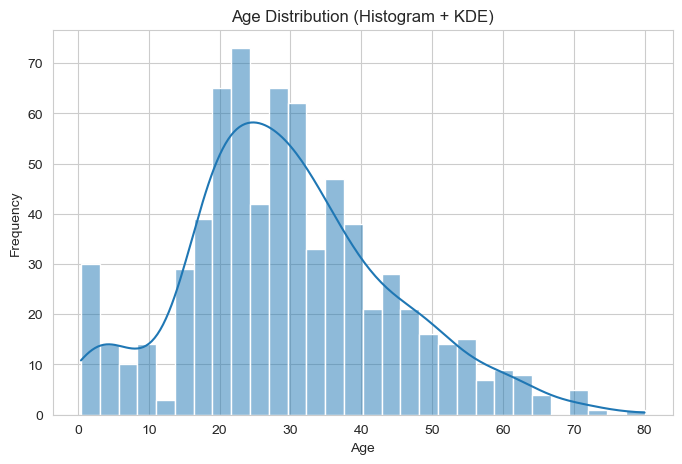

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data_2['Age'], kde=True, bins=30)

plt.title("Age Distribution (Histogram + KDE)")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()


### Observation

- Most passengers were between 20–40 years old.
- The distribution is slightly right-skewed.
- There are fewer elderly passengers.


## Passenger Count by Sex

We use a bar chart to visualize the number of male and female passengers.


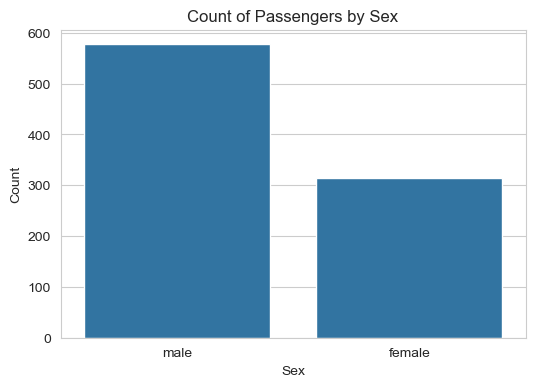

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=data_2)

plt.title("Count of Passengers by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.show()


### Observation

- There were more male passengers than female passengers on board.


## Fare Distribution

A boxplot is used to understand the spread and detect outliers in Fare.


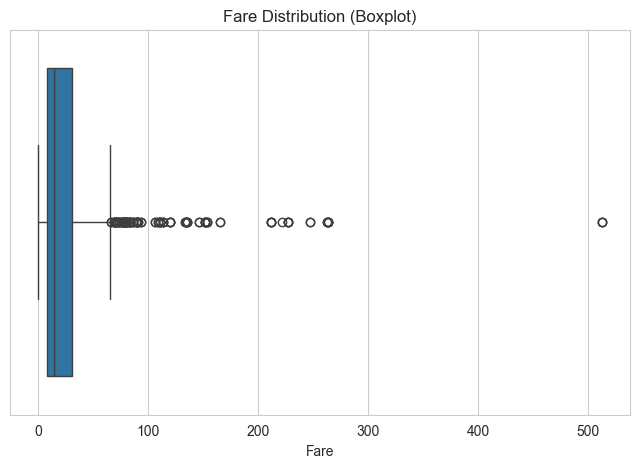

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_2['Fare'])

plt.title("Fare Distribution (Boxplot)")
plt.xlabel("Fare")

plt.show()


### Observation

- Fare distribution is highly skewed.
- There are many outliers (some passengers paid very high fares).
- Most passengers paid lower ticket prices.


## Conclusion

- Age distribution shows most passengers were young adults.
- Male passengers were more than female passengers.
- Fare distribution is skewed with several high-value outliers.


## Question 3: Bivariate Analysis

- Compare survival rate across Sex using a countplot.
- Compare Pclass vs Fare using a boxplot.
- Visualize Age vs Fare using a scatter plot color-coded by Survived.

# Answer:
## Survival Rate by Sex

We use a countplot with hue = Survived
to compare survival between males and females.




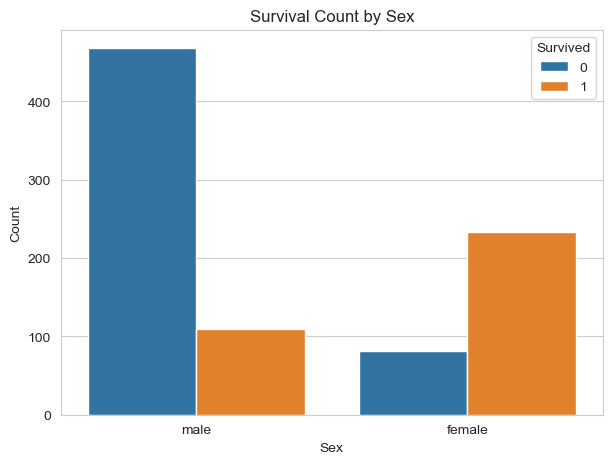

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(x='Sex', hue='Survived', data=data_2)

plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")

plt.show()


### Observation

- Female passengers had a significantly higher survival rate.
- Most male passengers did not survive.
- This indicates that women were given priority during evacuation.


## Passenger Class vs Fare

A boxplot helps us understand how ticket fare varies across different passenger classes.


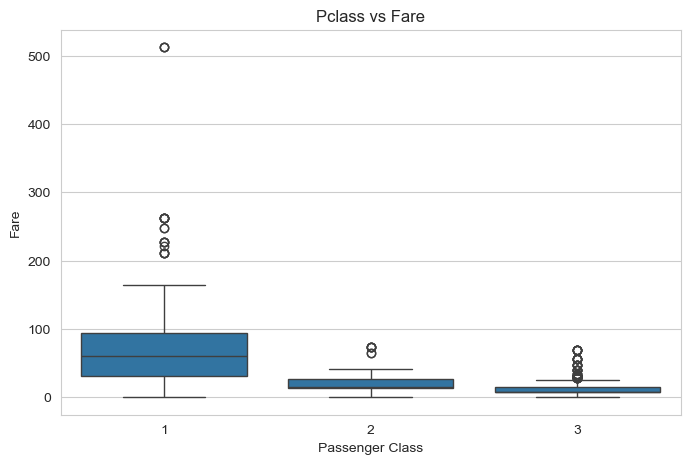

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Fare', data=data_2)

plt.title("Pclass vs Fare")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")

plt.show()


### Observation

- First-class passengers paid significantly higher fares.
- Third-class passengers paid the lowest fares.
- Fare distribution varies clearly across passenger classes.


## Age vs Fare (Colored by Survival)

A scatter plot helps us understand the relationship between Age and Fare.
Color coding by Survived shows survival distribution.


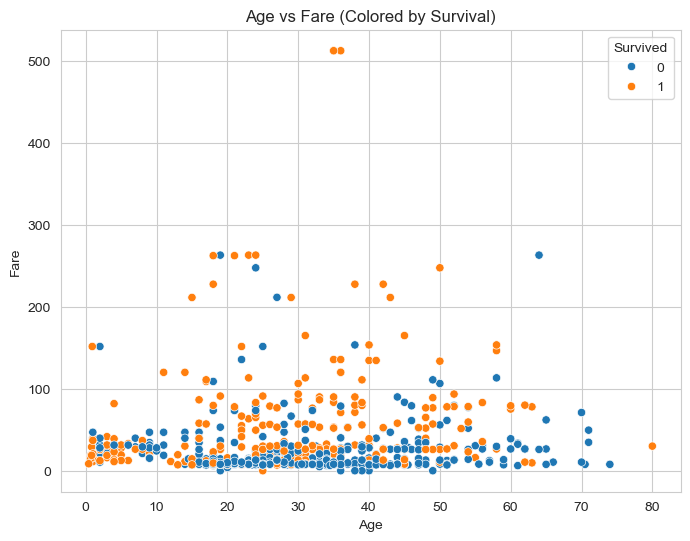

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data_2)

plt.title("Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()


### Observation

- Passengers who paid higher fares had a higher survival probability.
- There is no strong direct relationship between Age and Fare.
- Survival appears more influenced by Fare and class rather than Age alone.


## Conclusion

- Females had a higher survival rate compared to males.
- Fare varies significantly across passenger classes.
- Higher fare passengers showed better survival probability.
